In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
os.chdir("C:/Users/16472/Desktop/BlastTNG_Compression")
from astropy.io import fits
from scipy import signal

# HOME Index and Times.

# Start Index
    
#     7035032
#     7192434
#     7377037
#     7472238
#     7847344
    
# End Index

# 12:52:51
# 13:06:07
# 13:18:05
# 13:49:41
# 14:05:43
# 15:09:14

# True Home indices are aout 36000000 to 46000000 based on ctime calculations
# We found that for when we pointed at HOME, the Ctime index is roughly 3.6e8 to 4.6e, look at KID files between these indices

# INDICES 
# phase1, time1 : 36000000 to 39000000
# phase2, time2 : 39000000 to 42000000

In [3]:
def get_statistics(data_array, data_array_2=None):
    """
    Helper Function used to gather basic statistics about data arrays
    """
    results = "The MEAN is: " + str(np.mean(data_array)) +\
                 "\nThe STANDARD DEVIATION is: " + str(np.std(data_array)) +\
                    "\nThe MAX and MIN are: " + str(np.max(data_array)) + ', ' + str(np.min(data_array))
    if data_array_2 is not None:
        comp_results = "The comp. MEAN is: " + str(np.mean(data_array_2)) +\
                 "\nThe comp. STANDARD DEVIATION is: " + str(np.std(data_array_2)) +\
                    "\nThe comp. MAX and MIN are: " + str(np.max(data_array_2)) + ' ' + str(np.min(data_array_2))
        return (results, comp_results)
    return results

def show_plot(x, y, xlab='', ylab='', title=''):
    plt.figure(figsize = (16, 12))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.plot(x, y)
    plt.show()

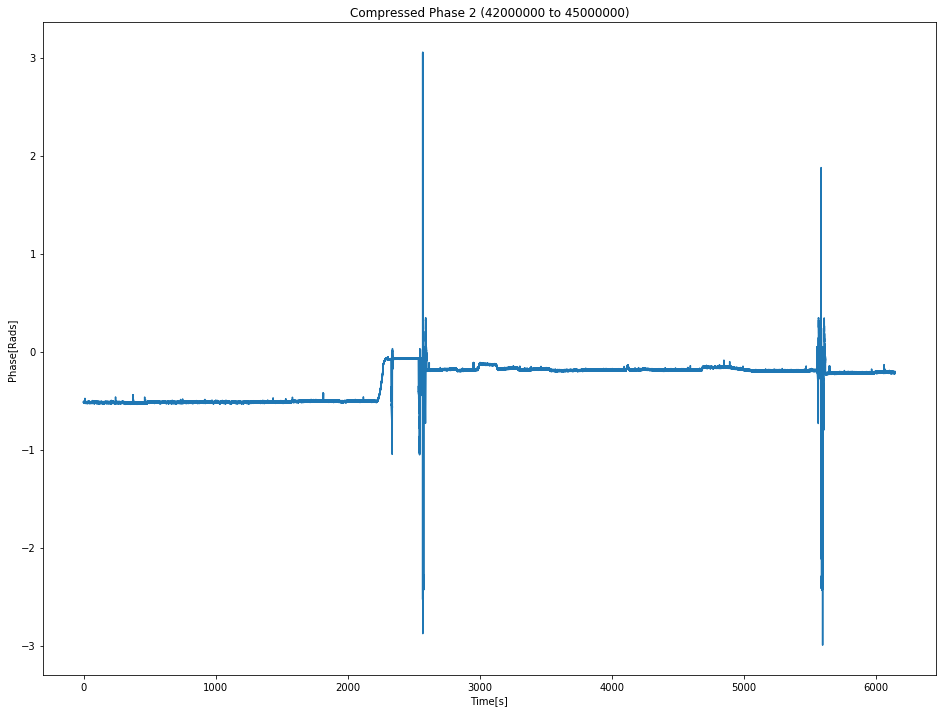

For Phase
The MEAN is: -0.3093919693233396
The STANDARD DEVIATION is: 0.20167615272693665
The MAX and MIN are: 3.056184322280652, -2.995965534479678

For Time
The MEAN is: 3071.9989760000008
The STANDARD DEVIATION is: 1773.6200269504318
The MAX and MIN are: 6143.997952, 0.0


In [4]:
# Load Files here
# 
# print("First sample taken at 32780000, Last sample taken at 32784869 (For Phase)") 

time2 = np.load("Time3.npy")
phase2 = np.load("phase3.npy")

show_plot(time2, phase2, "Time[s]", 'Phase[Rads]',"Compressed Phase 2 (42000000 to 45000000)")
print("For Phase")
print(get_statistics(phase2))
print("\nFor Time")
print(get_statistics(time2))


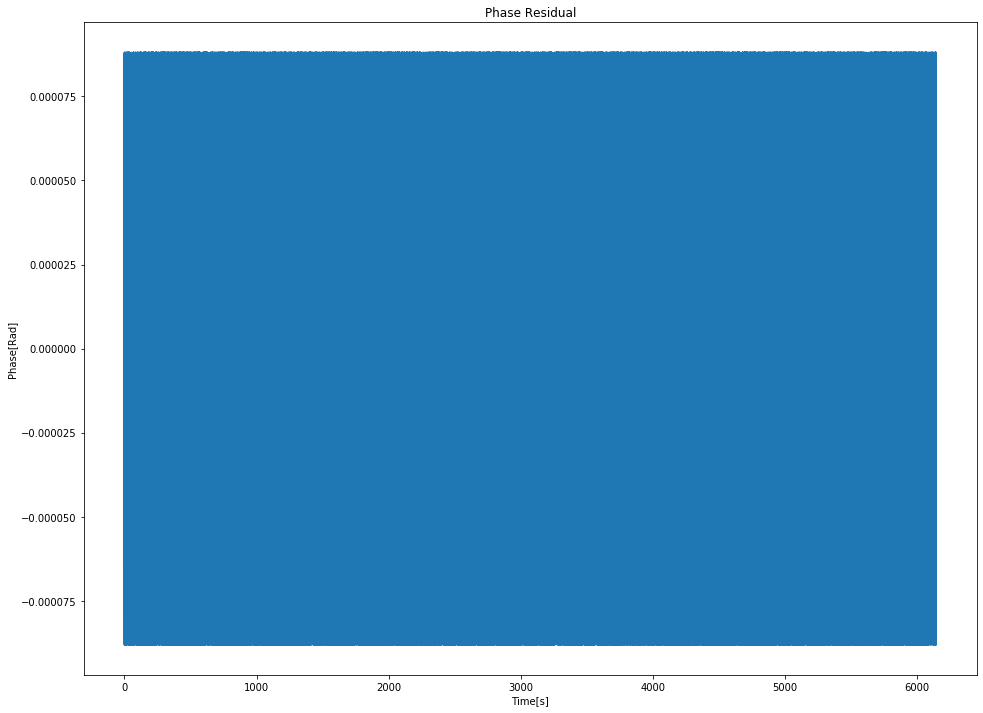

The MEAN is: -9.849377091222092e-09
The STANDARD DEVIATION is: 5.0901529132572575e-05
The MAX and MIN are: 8.816043633610993e-05, -8.816045464823952e-05


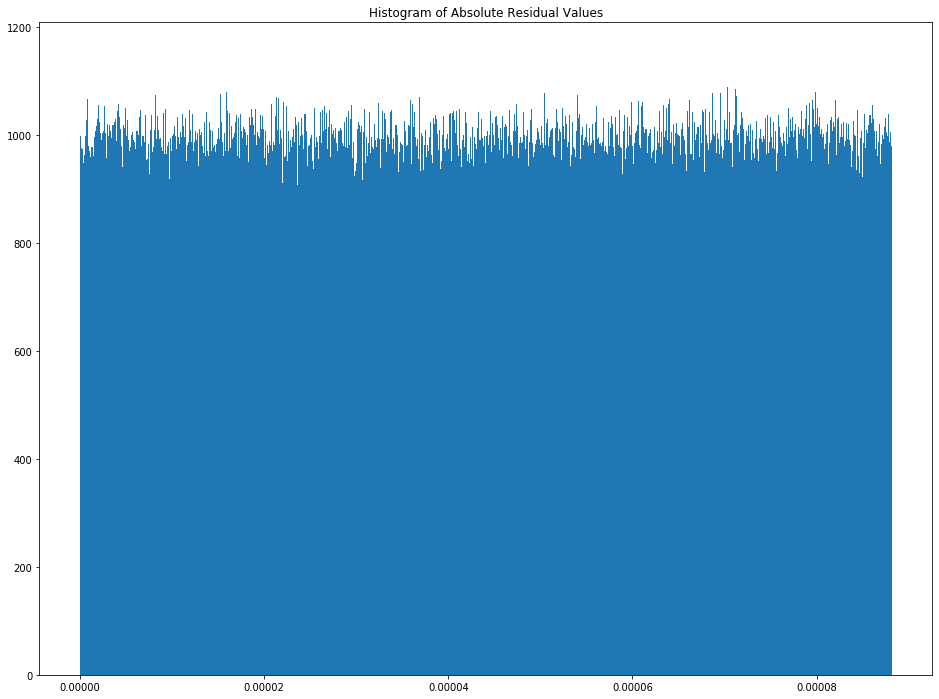

The MEAN is: 4.4081905456467684e-05
The STANDARD DEVIATION is: 2.5450960224938667e-05
The MAX and MIN are: 8.816045464823952e-05, 2.940236942805541e-11


In [11]:
# Lets get the compressed file

# Okay, let's investigate all this post compression 
# Lets only care about the second plot

# fits.CompImageHDU(data=phase2, compression_type='RICE_1').writeto("rice_phase2_comp.fits", overwrite=True)
comp_phase_2 = fits.getdata("rice_phase2_comp.fits")

# What does residual phase look like?
show_plot(time2, phase2 - comp_phase_2, 'Time[s]', 'Phase[Rad]', 'Phase Residual')
print(get_statistics(phase2 - comp_phase_2))


plt.figure(figsize = (16, 12))
plt.title("Histogram of Absolute Residual Values")
plt.hist(np.abs(phase2 - comp_phase_2), bins=3000)
plt.show()

print(get_statistics(np.abs(phase2-comp_phase_2)))

In [9]:
print('\nPhase')
print(get_statistics(phase2))

print('\n(Compressed) Phase')
print(get_statistics(comp_phase_2))

print('\n(Residual) Phase')
print(get_statistics(phase2 - comp_phase_2))

Time
The MEAN is: 3071.9989760000008
The STANDARD DEVIATION is: 1773.6200269504318
The MAX and MIN are: 6143.997952, 0.0

Phase
The MEAN is: -0.3093919693233396
The STANDARD DEVIATION is: 0.20167615272693665
The MAX and MIN are: 3.056184322280652, -2.995965534479678

(Compressed) Phase
The MEAN is: -0.30939195947396236
The STANDARD DEVIATION is: 0.20167616170589595
The MAX and MIN are: 3.0561704815301556, -2.996045048298644

(Residual) Phase
The MEAN is: -9.849377091222092e-09
The STANDARD DEVIATION is: 5.0901529132572575e-05
The MAX and MIN are: 8.816043633610993e-05, -8.816045464823952e-05


Compressed and original power spectrum phase both look identical....

Residual is basically 0. There is literally 0 noise generated from compressing this data.


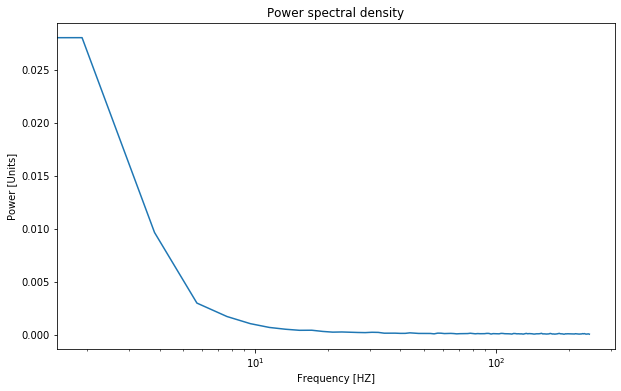

Frequency
The MEAN is: 122.0
The STANDARD DEVIATION is: 70.98488688915879
The MAX and MIN are: 244.0, 0.0

Power Spectrum
The MEAN is: 0.00046729310408271047
The STANDARD DEVIATION is: 0.002606612428192225
The MAX and MIN are: 0.028006568888103895, 4.341020543327942e-05


In [10]:
freqs, psd = signal.welch(phase2)

plt.figure(figsize=(10, 6))
plt.semilogx(freqs*488, psd)
plt.title('Power spectral density')
plt.xlabel('Frequency [HZ]')
plt.ylabel('Power [Units]')
plt.show()

print('Frequency')
print(get_statistics(freqs*488))

print('\nPower Spectrum')
print(get_statistics(psd))

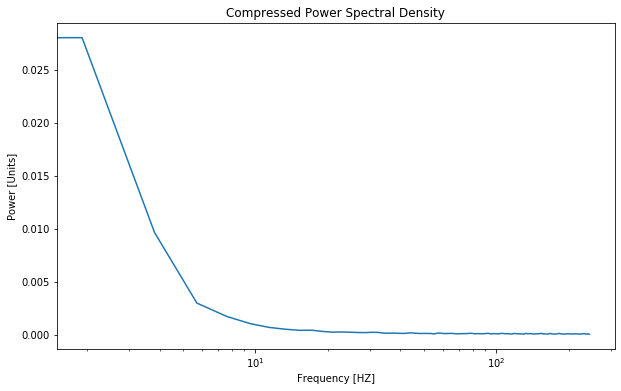


(Compressed) Power Spectrum
The MEAN is: 0.000467298257184704
The STANDARD DEVIATION is: 0.0026066081126573065
The MAX and MIN are: 0.028006545598422486, 4.341351645215063e-05


In [11]:
comp_freqs, comp_psd = signal.welch(comp_phase_2)

plt.figure(figsize=(10, 6))
plt.semilogx(comp_freqs*488, comp_psd)
plt.title('Compressed Power Spectral Density')
plt.xlabel('Frequency [HZ]')
plt.ylabel('Power [Units]')
plt.show()

print('\n(Compressed) Power Spectrum')
print(get_statistics(comp_psd))

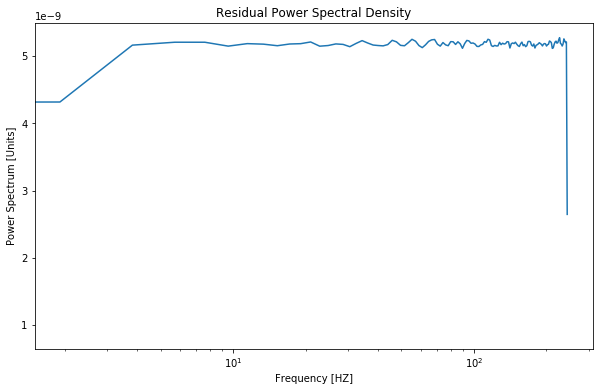


(Residual) Power Spectrum
The MEAN is: 5.12186695325468e-09
The STANDARD DEVIATION is: 4.445260076886865e-10
The MAX and MIN are: 5.271807017067496e-09, 8.645201779901011e-10


In [12]:
residual_freqs, residual_psd = signal.welch(phase2 - comp_phase_2)

plt.figure(figsize=(10, 6))
plt.semilogx(residual_freqs*488, residual_psd)
plt.title('Residual Power Spectral Density')
plt.xlabel('Frequency [HZ]')
plt.ylabel('Power Spectrum [Units]')
plt.show()

print('\n(Residual) Power Spectrum')
print(get_statistics(residual_psd))

One could argue that this residual is basically 0.

In [14]:
print('Frequency')
print(get_statistics(freqs))

print('\nPower Spectrum')
print(get_statistics(psd))

print('\n(Compressed) Power Spectrum')
print(get_statistics(comp_psd))

print('\n(Residual) Power Spectrum')
print(get_statistics(residual_psd))

Frequency
The MEAN is: 0.25
The STANDARD DEVIATION is: 0.1454608337892598
The MAX and MIN are: 0.5, 0.0

Power Spectrum
The MEAN is: 0.00046729310408271047
The STANDARD DEVIATION is: 0.002606612428192225
The MAX and MIN are: 0.028006568888103895, 4.341020543327942e-05

(Compressed) Power Spectrum
The MEAN is: 0.000467298257184704
The STANDARD DEVIATION is: 0.0026066081126573065
The MAX and MIN are: 0.028006545598422486, 4.341351645215063e-05

(Residual) Power Spectrum
The MEAN is: 5.12186695325468e-09
The STANDARD DEVIATION is: 4.445260076886865e-10
The MAX and MIN are: 5.271807017067496e-09, 8.645201779901011e-10


Original file size is 23438 KB

Compressed file size is 2498 KB

<b>Compression factor of 9.4</b>
 
<em>This time, I compressed a 1D array and I got basically a lossless compression with a factor of 9.4. <b>(lost 0.6 compression in trade off)</em></b>

In [15]:
# Get Run time?
# How long does it take for 3000 detectors?

# import time
# os.chdir("C:/Users/16472/Desktop/BlastTNG_Compression/Junk")

# start_time = time.time()

# for i in range(3000):
#     comp_phase_2 = fits.CompImageHDU(data=phase2, compression_type='RICE_1').writeto(str(i) + ".fits")
    
# print("--- %s seconds ---" % (time.time() - start_time))

Total Run Time for 3000 compressions was:

 <b>457.90322709083557 seconds </b>
 
 or 
 
 <b>7.6 minutes.</b>

In [16]:
st = fits.open("rice_phase2_comp.fits")
print(st.info())

Filename: rice_phase2_comp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU      6   (3000000,)   float64   
None


In [30]:
# Subtracting the mean of the data array?
# Send down reference value?

-0.3093919693233396
-0.5166215166246202
-0.20722954730128057
